# Quantum Fourier Transform 


In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qutip import *



QFT is defined as

$ QFT:|x> = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} \omega_{x}^{k}|k>$

where $\omega_{x}^{k}$ is $N^{th}$ ($N = 2^{n}$) root of unity: $e^{\frac{2\pi i}{2^{n}}}$.

QFT: $F_{N} =  \frac{1}{\sqrt{N}} \begin{bmatrix}
    1  &         1   &        1       &     1          &   \cdots   &  1   \\
    1  &  \omega_{n} & \omega_{n}^{2} & \omega_{n}^{3} &   \cdots   & \omega_{n} ^{N-1}\\
    1  &  \omega_{n}^{2} & \omega_{n}^{4} & \omega_{n}^{6} &   \cdots   & \omega_{n} ^{2(N-1)}\\
    1  &  \omega_{n}^{3} & \omega_{n}^{6} & \omega_{n}^{9} &   \cdots   & \omega_{n} ^{3(N-1)}\\
   \vdots  & \vdots  & \vdots         & \vdots         &    \dots   & \vdots \\
   1  &  \omega_{n}^{(N-1)} & \omega_{n}^{2(N-1)} & \omega_{n}^{3(N-1)} &   \cdots   & \omega_{n} ^{(N-1((N-1)}\\
\end{bmatrix}$





### 1. QFT ( 1 qubit)



For single qubit circuit ($n = 1, N = 2^{1} = 2)$


$\omega_n = e^{\frac{2\pi i}{2^{n}}} = -1$.

QFT = $\frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}$
    
It is very simple, QFT in single qubit id just a Hadamate operation.


### 2. QFT (2 qubits)


    
For two qubit circuit, ($n =2, N = 2^{2} = 4)$


$\omega_{n} = e^{\frac{2\pi i}{2^{n}}} = i$

$QFT_2 = \frac{1}{{2}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{bmatrix}$
 
Our task is to represent this matrix in terms of fundamental gate metrix.

#### 2.2 Circuit

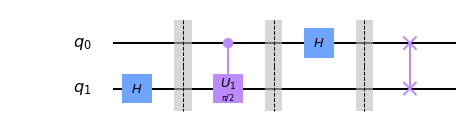

In [6]:
qc = QuantumCircuit(2)
qc.h(1)
qc.barrier()
qc.cu1(np.pi/2, 0, 1)
qc.barrier()
qc.h(0)
qc.barrier()
qc.swap(0,1)
qc.draw('mpl')

#### 2.3  State vector

Lets observe what happens to quantum state as we pass through these quantum gates one by one: 



<ul>    
<li> Initial state: |00>
<li> After Hadamard Gate on qubit 2 : $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
<li> After phase shift Gate : $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
<li> After Hadamard Gate on qubit 1 : $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> - \frac{1}{{2}}|11>$
<li> After SWAP:  $\frac{1}{{2}}|00> + \frac{1}{{2}}|10>  +  \frac{1}{{2}}|01> - \frac{1}{{2}}|11>$


In [7]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


#### 2.5 State vector as tensor product


    
 Since this circuit consists of pure superposition brought up by hadamard gate, it is possible to obtain final state vector by taking direct product of single qubit states. Results from operation of H gate on single qubit can be multiplied with direct product operation to get final state.
    
$ \frac{1}{\sqrt{2}} (|0 \rangle + | 1\rangle) \otimes \frac{1}{\sqrt{2}}(|0 \rangle + | 1\rangle) = \frac{1}{2}(|00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle $
    

i.e., $\frac{1}{\sqrt{2}}\begin{bmatrix}
    1   \\
    1 
\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}
    1   \\
    1 
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
    1   \\
    1 \\
    1 \\
    1
\end{bmatrix}$

Where $|00 \rangle , |01 \rangle , |10 \rangle $ and $ |11 \rangle $ are basis states for two qubit system.


#### 2.6 Matrix Element

#### How to realize it the quantum circuit?


    
    
$ I = \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix};H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix}; C_{u1} = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & i
\end{pmatrix}; SWAP =\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}$


At first barrier: $ U_1 = I \otimes H $
    
At second barrier: $ U_2 =  C _{u1} \times (I \otimes H) $
    
At third barrier: $ U_3 = (H \otimes I) \times C _{u1} \times (I \otimes H) $    

At fourth barrier: $U_4 =  SWAP \times (H \otimes I) \times C _{u1} \times (I \otimes H) $     

In [8]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.5+0.j   0.5-0.j   0.5-0.j   0.5-0.j ]
 [ 0.5+0.j   0. +0.5j -0.5+0.j  -0. -0.5j]
 [ 0.5+0.j  -0.5+0.j   0.5-0.j  -0.5+0.j ]
 [ 0.5+0.j  -0. -0.5j -0.5+0.j   0. +0.5j]]


- Implementing Numpy

In [99]:
I = np.eye(2,2)
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
H_kron_I = np.kron(H,I)
CU1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0.+1.j]])
I_kron_H = np.kron(I,H)
SWAP = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])

In [100]:
U = np.dot(H_kron_I,np.dot(CU1,np.dot(I_kron_H,SWAP)))
U

array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j ,  0. +0.5j, -0.5+0.j ,  0. -0.5j],
       [ 0.5+0.j , -0.5+0.j ,  0.5+0.j , -0.5+0.j ],
       [ 0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. +0.5j]])

In [101]:
ket = np.array([1,0,0,0])
np.dot(U,ket)

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

### 3. QFT (3 qubits)

#### 3.1 Circuit Diagram

In [13]:
def qft3():
    n = 3
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q,c)
    qc.h(q[2])
    qc.barrier()
    qc.cu1(np.pi/2, q[1], q[2])
    qc.barrier()
    qc.h(q[1])
    qc.barrier()
    qc.cu1(np.pi/4, q[0], q[2])
    qc.barrier()
    qc.cu1(np.pi/2, q[0], q[1])
    qc.barrier()
    qc.h(q[0])
    qc.barrier()
    qc.swap(q[0], q[2])
    return q,c,qc

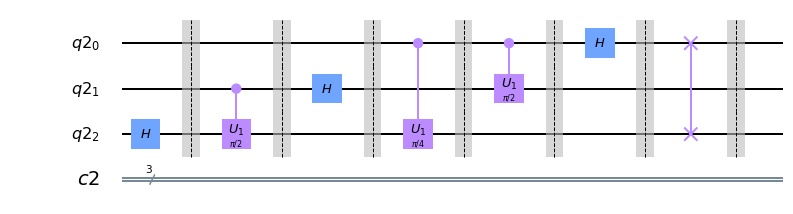

In [14]:
q,c,qc = qft3()
qc.barrier()
qc.draw(output='mpl')

#### 3.2 State vector


    
<ul>        
<li> Initial state: |000>
<li> After Hadamard Gate on 3rd qubit : $\frac{1}{\sqrt{2}}(|000> + |001>) $
<li> After CU1 gate on qubit (2,3) : $\frac{1}{\sqrt{2}}(|000> + |001>) $
<li> After CU1 gate on qubit (1,3) : $\frac{1}{\sqrt{2}}(|000> + |001>) $
<li> After Hadamard Gate on qubit 2 : $\frac{1}{{2}}(|000> + |010> +  |001> -|011> )$
<li> After CU1 gate on qubit (0,1): $\frac{1}{{2}}(|000> + |010> +  |001> -|011> )$
<li> After Hadamard Gate on qubit 3 : $\frac{1}{2\sqrt{2}}(|000> + |001> +  |010> + |011> +  |000> - |001> - |010> + |011)$
    
    

In [16]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


### Measurement

### References
-----
1. https://www.youtube.com/watch?v=bntew-yoMzk 